I'll be checking for multi-collinearity in the ASCT dataset to ensure that the multivariate cox model is appropiately fitted. 

The continous variables are: 
1. Age 
2. Hemoglobin concentration 
3. Creatinine concentration 

The categorical variables are: 
1. Gender
2. At risk (Y/N) 
3. Tandem (Y/N) 
4. Number of maintenace drugs (dummy variable for 1) 
5. Number of maintenace drugs (dummy variable for 2) 

In this notebook, I'll be assesing the continous variables. 

Load neccessary libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print('complete')

complete


Read dataset

In [2]:
df = pd.read_csv("/Users/anthonyquint/Desktop/LHSC_Work_Folder/Mina/MM_ACST_Study/Prepared_data_for_R_analysis/ASCT_Multivar.csv")
#df.head(22)

Split into continous and categorical dataframes, and clean data

In [3]:
df_cont = df[['Age','Hemoglobin','Creatinine' ]]
#df_cat = df[['GENDER','At_Risk (Y/N)','TANDEM', 'Num. Maint. Drugs. (Dummy var for 1)','Num. Maint. Drugs. (Dummy var for 2)']]
df_cont.head()

,Age,Hemoglobin,Creatinine
0,52.41,102.0,54
1,58.00,80.0,355
2,63.84,90.0,172
3,56.98,NaN,187
4,66.32,NaN,68


Analyze correlations between continous variables 

                 Age  Hemoglobin  Creatinine
Age         1.000000   -0.134604   -0.019437
Hemoglobin -0.134604    1.000000   -0.212791
Creatinine -0.019437   -0.212791    1.000000


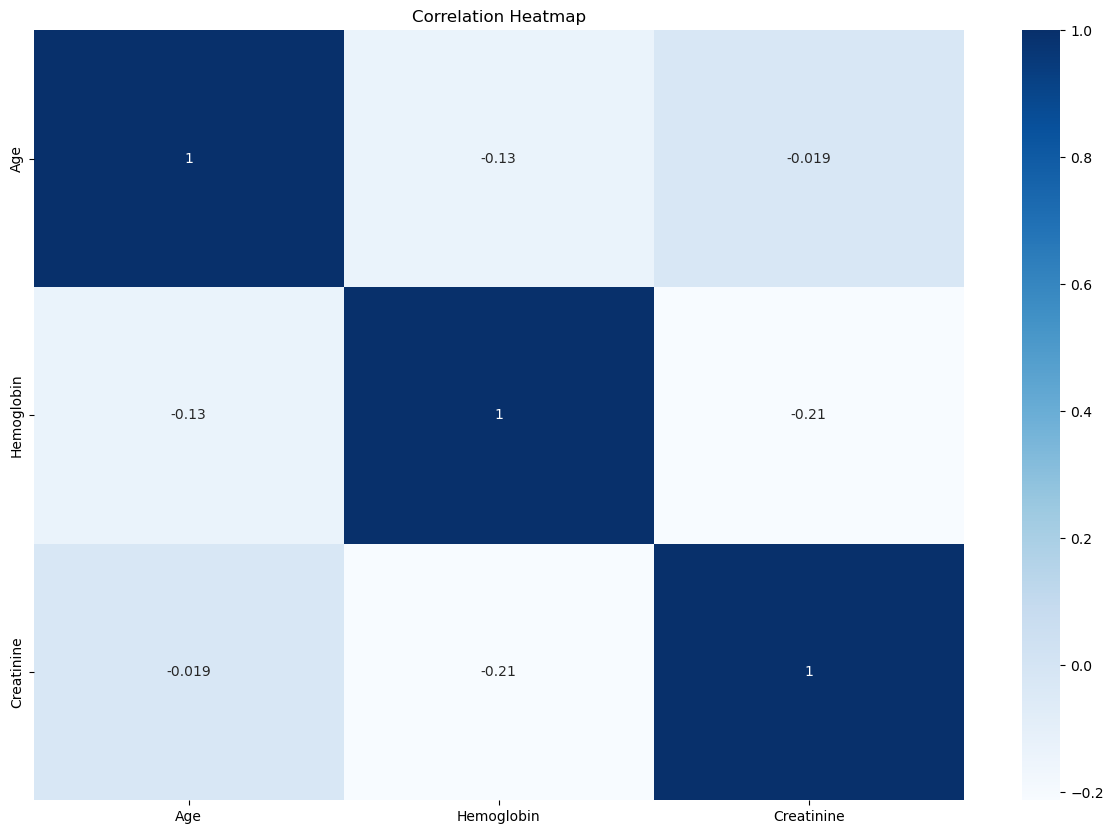

In [4]:
# Delete index 21 and 122 since their creatinine values are: 1,124 and 1,540 respectively, being recognized as strings. 
df_cont = df_cont.drop(labels=21, axis=0)
df_cont = df_cont.drop(labels=121, axis=0)


df_cont["Creatinine"] = pd.to_numeric(df_cont["Creatinine"], downcast="float")


print(df_cont.corr(method='pearson'))
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_cont.corr(method='pearson'), annot = True, cmap="Blues")
plt.title("Correlation Heatmap")
fig

Analyze relationships between categorical variables, will do this with r